# Working with Dates

## Exercise 1

#### Task: Take the following `date_string` and convert to a datetime. Hint: `pd.datetime()`

In [1]:
date_string = '2023-10-26 14:30:00'

#### Answer

In [2]:
import pandas as pd # Provides data structures and functions for efficient data manipulation and analysis

# Convert the string to a pandas Timestamp
timestamp = pd.to_datetime(date_string)

print(f"Original String: {date_string}")
print(f"Converted Timestamp: {timestamp}")

# Check the data type
print(f"Data type of timestamp: {type(timestamp)}")

Original String: 2023-10-26 14:30:00
Converted Timestamp: 2023-10-26 14:30:00
Data type of timestamp: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Exercise 2

#### Task: Convert `datetime` object to `date`

#### Answer

In [3]:
date_only = timestamp.date()

print(f"Date only: {date_only}")

# Check the data type
print(f"Data type of date_only: {type(date_only)}")

Date only: 2023-10-26
Data type of date_only: <class 'datetime.date'>


## Exercise 3

#### Task: Convert `date` object back into a string

#### Answer

In [4]:
# Assuming 'date_only' from the previous step
date_string_back = date_only.strftime('%Y-%m-%d')

print(f"Date converted back to string: {date_string_back}")

# Check the data type
print(f"Data type of the new string: {type(date_string_back)}")

Date converted back to string: 2023-10-26
Data type of the new string: <class 'str'>


## Bonus

#### Task: Convert `date_series` from a series of string dates into a series of `datetime`

In [5]:
# Create a Series with various string formats
date_series = pd.Series(['2023-10-26', '26-10-2023', '2023 Oct 26'])

#### Answer

In [6]:
# Convert the entire Series
datetime_series = pd.to_datetime(date_series)

print(datetime_series)
print(datetime_series.dtype)

0   2023-10-26
1   2023-10-26
2   2023-10-26
dtype: datetime64[ns]
datetime64[ns]


Explanation: The `dayfirst=True` argument helps pandas correctly interpret the `26-10-2023` format as day-first. Without it, it might incorrectly assume the month is first. `pandas.to_datetime()` returns a `datetime64[ns]` data type, which is optimized for time-based operations within pandas.

***

# Exploring Data & Visualizing Time Series

## Exercise 4

#### Task: Input new filepath here

Look a the `Datasets-master` folder and test out different filepaths here. Keep running hte next few cells to see the lineplot

In [7]:
data = 'daily-max-temperatures.csv'

#### Load Data

In [8]:
# Load the filepath and print out the head
filepath = 'Datasets-master/'+data
df = pd.read_csv(filepath, header=0, index_col=0, parse_dates=True)
df.index = df.index.rename('Date')
df.head()

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


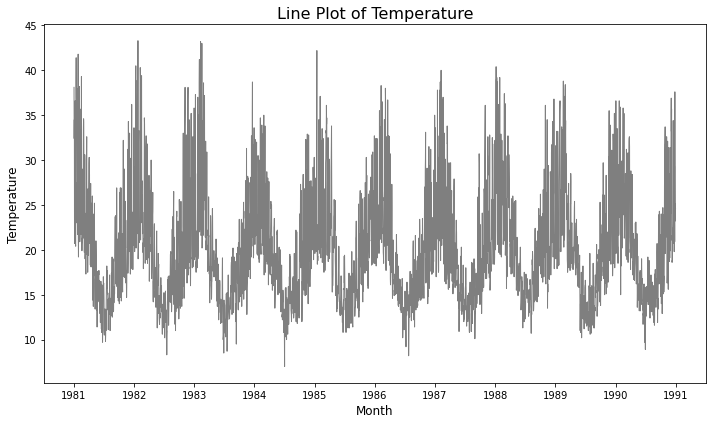

In [9]:
# Use lineplot function to plot the time series
from time_series_helper import lineplot # Function for creating standardized lineplots 

lineplot(df, df.columns[0])

***

# Seasonal Plots

## Exercise 5

#### Task: Use the `seasonalplot` method to plot a seasonal plot of the data you selected in Exercise 4

#### Answer

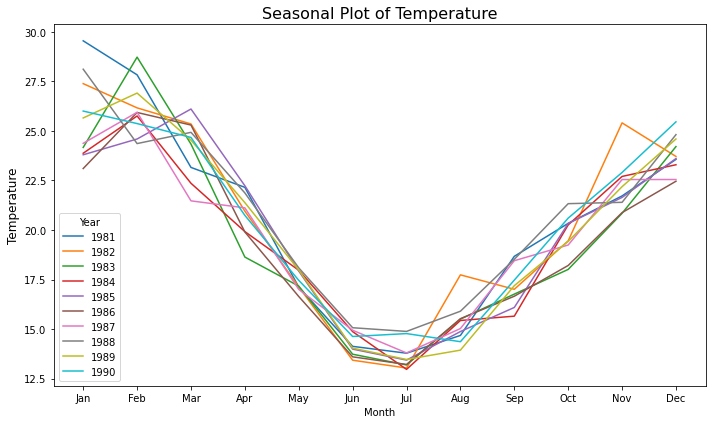

In [10]:
from time_series_helper import seasonalplot # Function for creating standardized seasonal line & bar plots
seasonalplot(df, df.columns[0])

#### What do you notice?

## Exercise 6

#### Task: Use the `seasonalboxplot` method to plot a seasonal box plot of the data you selected in Exercise 4

#### Answer

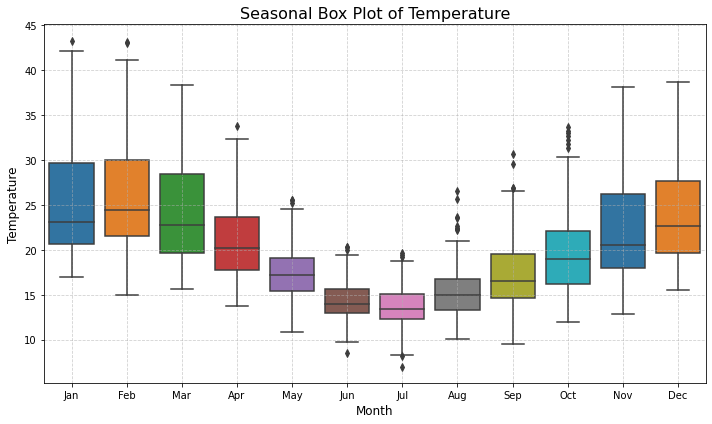

In [11]:
from time_series_helper import seasonalboxplot
seasonalboxplot(df, df.columns[0])

#### What do you notice?

***

# Time Series Decomposition

## Exercise 7

#### Task: Apply classical decomposition (using `seasonal_decompose`)

#### Answer

In [12]:
from time_series_helper import decomp_plots
from statsmodels.tsa.seasonal import seasonal_decompose # classical decomposition
from statsmodels.tsa.seasonal import STL # LOESS

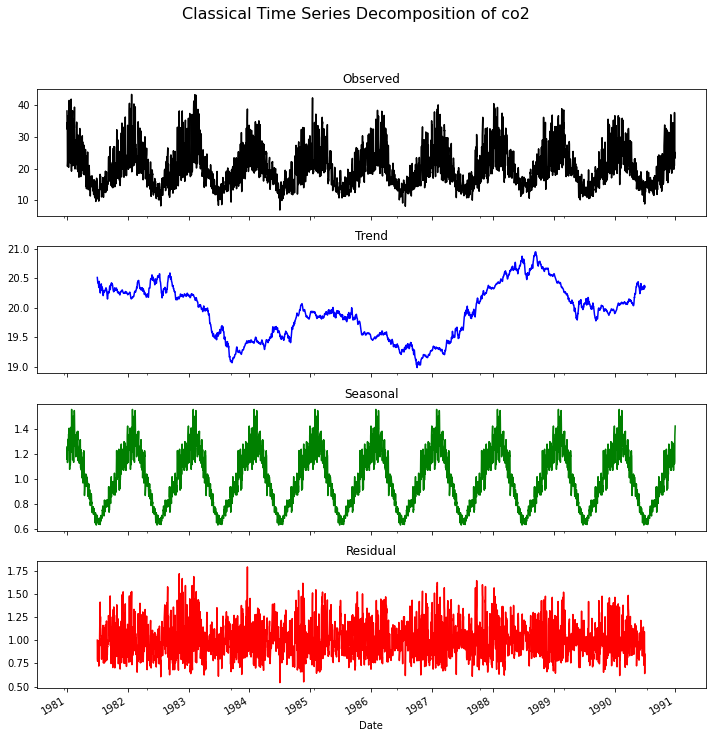

In [13]:
classic_add = seasonal_decompose(df, model='multiplicative', period=365)
decomp_plots(classic_add)

## Exercise 8

#### Task: Apply STL decomposition (using `STL`) 

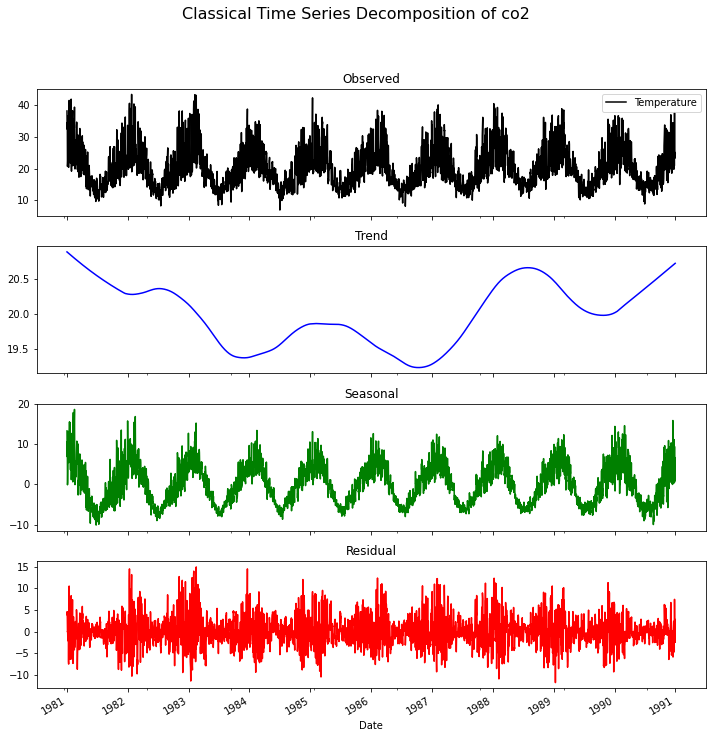

In [14]:
res = STL(df, period=365).fit()
decomp_plots(res)

#### Which decomposition worked better and why?

In [15]:
from time_series_helper import resid_plot

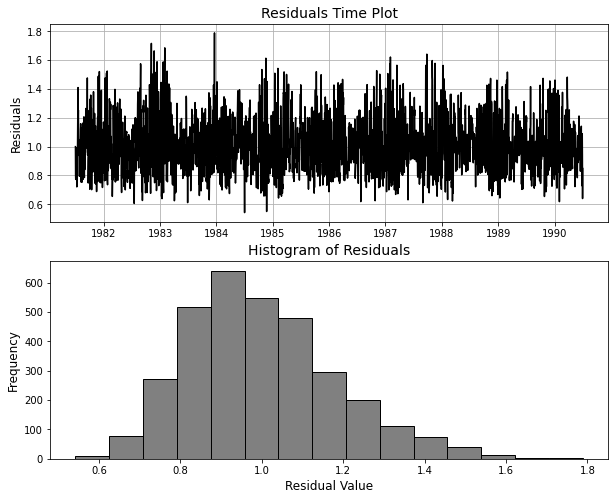

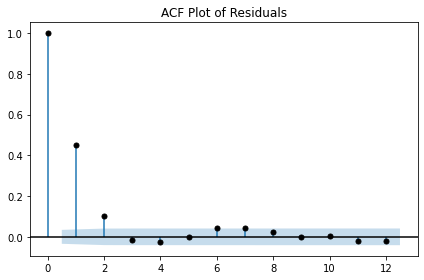

In [16]:
resid_plot(classic_add.resid)

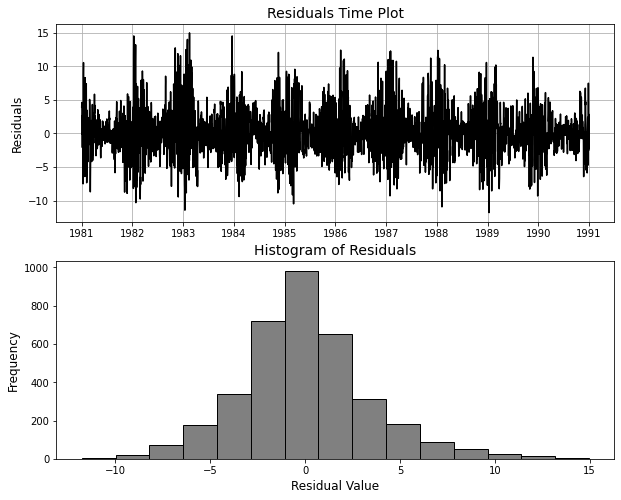

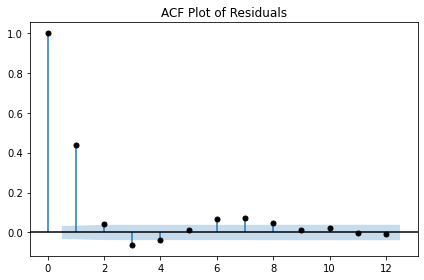

In [17]:
resid_plot(res.resid)

***

# Forecasting

## Exercise 9

#### Task: Plot mean, naive and seasonal forecasts for your dataset. Decide on which forecast method fits your data the best

#### Answer

In [18]:
from time_series_helper import train_test_split, simple_forecasts, plot_forecasts, calc_errors

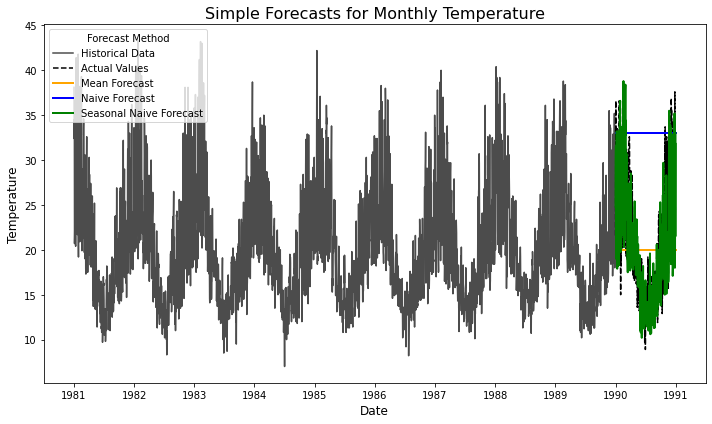

,MAE,MSE,Bias
Model,,,
Mean,4.81,36.55,0.37
Naive,12.85,196.59,-12.66
Seasonal Naive,4.26,33.22,0.28


In [20]:
train, test = train_test_split(df, test_size=0.1)
plot_forecasts(train, test, df.columns[0])
calc_errors(train, test, df.columns[0])